In [1]:
import pandas as pd

data_frame = pd.read_csv("Geom(1).csv")

In [2]:
opt = 'adam'
loss = 'mse'

In [3]:
X = data_frame.values 
X.shape

(22, 122)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(X,test_size=0.2, random_state=11)
x_train, x_validate = train_test_split(x_train,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(13, 122)
(5, 122)
(4, 122)


In [5]:
import keras
from keras import layers

encoding_dim = 30

input_pts = keras.Input(shape=(122,))
a = layers.Dense(70,activation='linear')(input_pts)

encoded = layers.Dense(encoding_dim, activation='linear')(a)

b = layers.Dense(70,activation="linear")(encoded)
decoded = layers.Dense(122, activation='linear')(b)

autoencoder = keras.Model(input_pts, decoded)

encoder = keras.Model(input_pts, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
b_layer = autoencoder.layers[-2]
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(b_layer(encoded_input)))

autoencoder.compile(optimizer=opt, loss=loss)

2021-11-15 14:31:30.802344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 14:31:30.924306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 14:31:30.925062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 14:31:30.926160: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=150,
                batch_size=13,
                shuffle=True,
                validation_data=(x_validate, x_validate))

2021-11-15 14:31:33.527393: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 12198.9180 - val_loss: 5177.2739
Epoch 2/150
1/1 [==============================] - 0s 20ms/step - loss: 8451.6084 - val_loss: 3840.8464
Epoch 3/150
1/1 [==============================] - 0s 19ms/step - loss: 6270.0503 - val_loss: 3144.4810
Epoch 4/150
1/1 [==============================] - 0s 18ms/step - loss: 5133.2705 - val_loss: 2803.8418
Epoch 5/150
1/1 [==============================] - 0s 20ms/step - loss: 4577.1572 - val_loss: 2612.2183
Epoch 6/150
1/1 [==============================] - 0s 18ms/step - loss: 4264.3013 - val_loss: 2447.9434
Epoch 7/150
1/1 [==============================] - 0s 18ms/step - loss: 3996.1072 - val_loss: 2263.9031
Epoch 8/150
1/1 [==============================] - 0s 18ms/step - loss: 3695.6677 - val_loss: 2056.3164
Epoch 9/150
1/1 [==============================] - 0s 19ms/step - loss: 3356.8059 - val_loss: 1837.2340
Epoch 10/150
1/1 [==============================] - 0s 18ms/step 

In [7]:
encoded_pts = encoder.predict(x_test)
decoded_pts = decoder.predict(encoded_pts)

In [8]:
encoded_pts.shape

(5, 30)

In [9]:
decoded_pts.shape

(5, 122)

In [10]:
x_test[0,0::2].shape # X coordinates

(61,)

In [11]:
x_test[0,1::2].shape # Y coordinates

(61,)

In [12]:
np.amax(X)

145.0

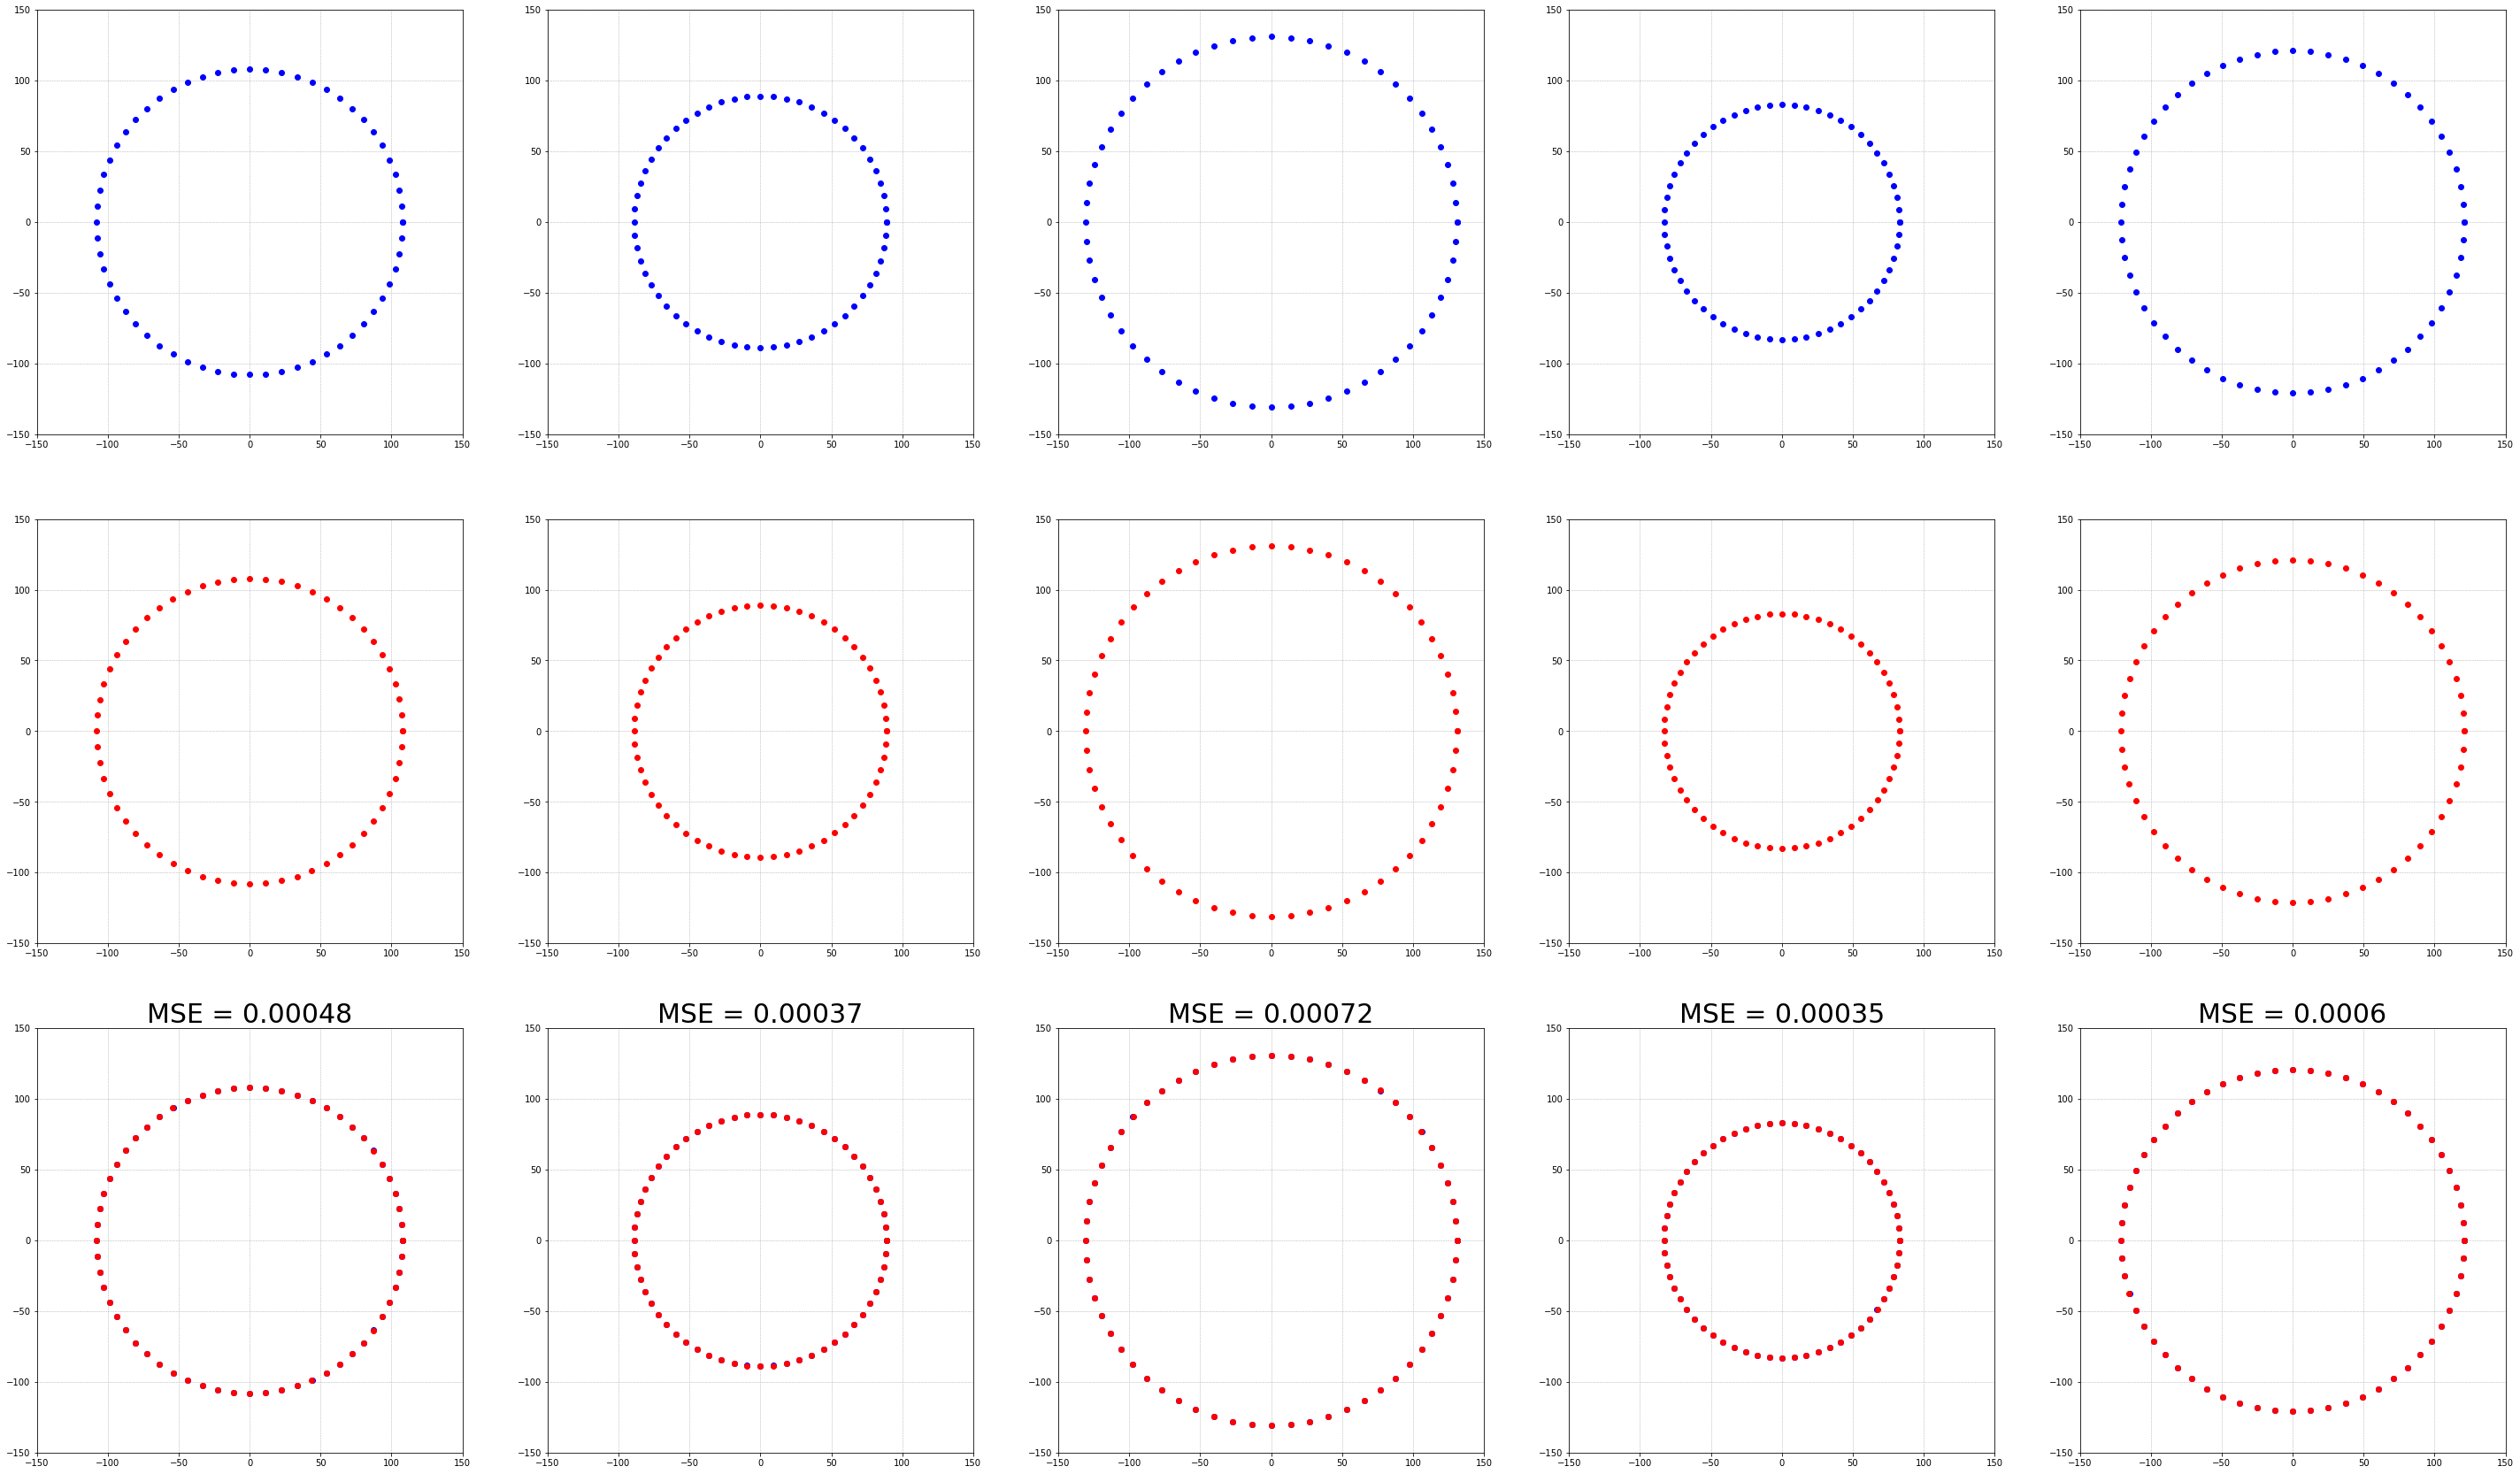

In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3,ncols=5,figsize=(50,30))

for i in range(len(x_test)):
    ax[0,i].set_xlim(xmin=-150,xmax=150)
    ax[0,i].set_ylim(ymin=-150,ymax=150)
    ax[0,i].plot(x_test[i,0::2], x_test[i,1::2],'bo')
    ax[0,i].grid(linestyle = '--', linewidth = 0.5)
    
    ax[1,i].set_xlim(xmin=-150,xmax=150)
    ax[1,i].set_ylim(ymin=-150,ymax=150)
    ax[1,i].plot(decoded_pts[i,0::2], decoded_pts[i,1::2],'ro')
    ax[1,i].grid(linestyle = '--', linewidth = 0.5)
    
    ax[2,i].set_xlim(xmin=-150,xmax=150)
    ax[2,i].set_ylim(ymin=-150,ymax=150)
    ax[2,i].plot(x_test[i,0::2], x_test[i,1::2],'bo')
    ax[2,i].set_xlim(xmin=-150,xmax=150)
    ax[2,i].set_ylim(ymin=-150,ymax=150)
    ax[2,i].plot(decoded_pts[i,0::2], decoded_pts[i,1::2],'ro')
    ax[2,i].grid(linestyle = '--', linewidth = 0.5)
    ax[2,i].set_title("MSE = "+str(round(mean_squared_error(x_test[i],decoded_pts[i]),5)),fontsize=30)

In [14]:
mean_squared_error(x_test,decoded_pts)

0.0005051487635793981

# 60

In [15]:
# This is the size of our encoded_2 representations
encoding_dim = 60  

# This is our input image
input_pts = keras.Input(shape=(122,))
# "encoded_2" is the encoded_2 representation of the input
a_2 = layers.Dense(70,activation='linear')(input_pts)
encoded_2 = layers.Dense(encoding_dim, activation='linear')(a_2)
# "decoded_2" is the lossy reconstruction of the input

b_2 = layers.Dense(70,activation='linear')(encoded_2)
decoded_2 = layers.Dense(122, activation='linear')(b_2)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_pts, decoded_2)

# This model maps an input to its encoded_2 representation
encoder = keras.Model(input_pts, encoded_2)

# This is our encoded_2 (32-dimensional) input

encoded_2_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model

b_layer_2 = autoencoder.layers[-2]

decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_2_input, decoder_layer(b_layer_2(encoded_2_input)))

autoencoder.compile(optimizer=opt, loss=loss)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print(" ")

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=150,
                batch_size=13,
                shuffle=True,
                validation_data=(x_validate, x_validate))

Epoch 1/150
1/1 [==============================] - 0s 348ms/step - loss: 9905.5381 - val_loss: 4527.0425
Epoch 2/150
1/1 [==============================] - 0s 19ms/step - loss: 7390.1167 - val_loss: 3674.8391
Epoch 3/150
1/1 [==============================] - 0s 19ms/step - loss: 5998.9995 - val_loss: 3190.8389
Epoch 4/150
1/1 [==============================] - 0s 17ms/step - loss: 5208.9121 - val_loss: 2854.4902
Epoch 5/150
1/1 [==============================] - 0s 16ms/step - loss: 4659.8516 - val_loss: 2564.5671
Epoch 6/150
1/1 [==============================] - 0s 18ms/step - loss: 4186.5850 - val_loss: 2292.0493
Epoch 7/150
1/1 [==============================] - 0s 18ms/step - loss: 3741.7371 - val_loss: 2035.3601
Epoch 8/150
1/1 [==============================] - 0s 17ms/step - loss: 3322.7280 - val_loss: 1799.5851
Epoch 9/150
1/1 [==============================] - 0s 16ms/step - loss: 2937.8540 - val_loss: 1588.4431
Epoch 10/150
1/1 [==============================] - 0s 20ms/ste

In [17]:
encoded_2_pts = encoder.predict(x_test)
decoded_2_pts = decoder.predict(encoded_2_pts)

In [18]:
encoded_2_pts.shape

(5, 60)

In [19]:
decoded_pts.shape

(5, 122)

In [20]:
x_test[0,0::2].shape

(61,)

In [21]:
x_test[0,1::2].shape

(61,)

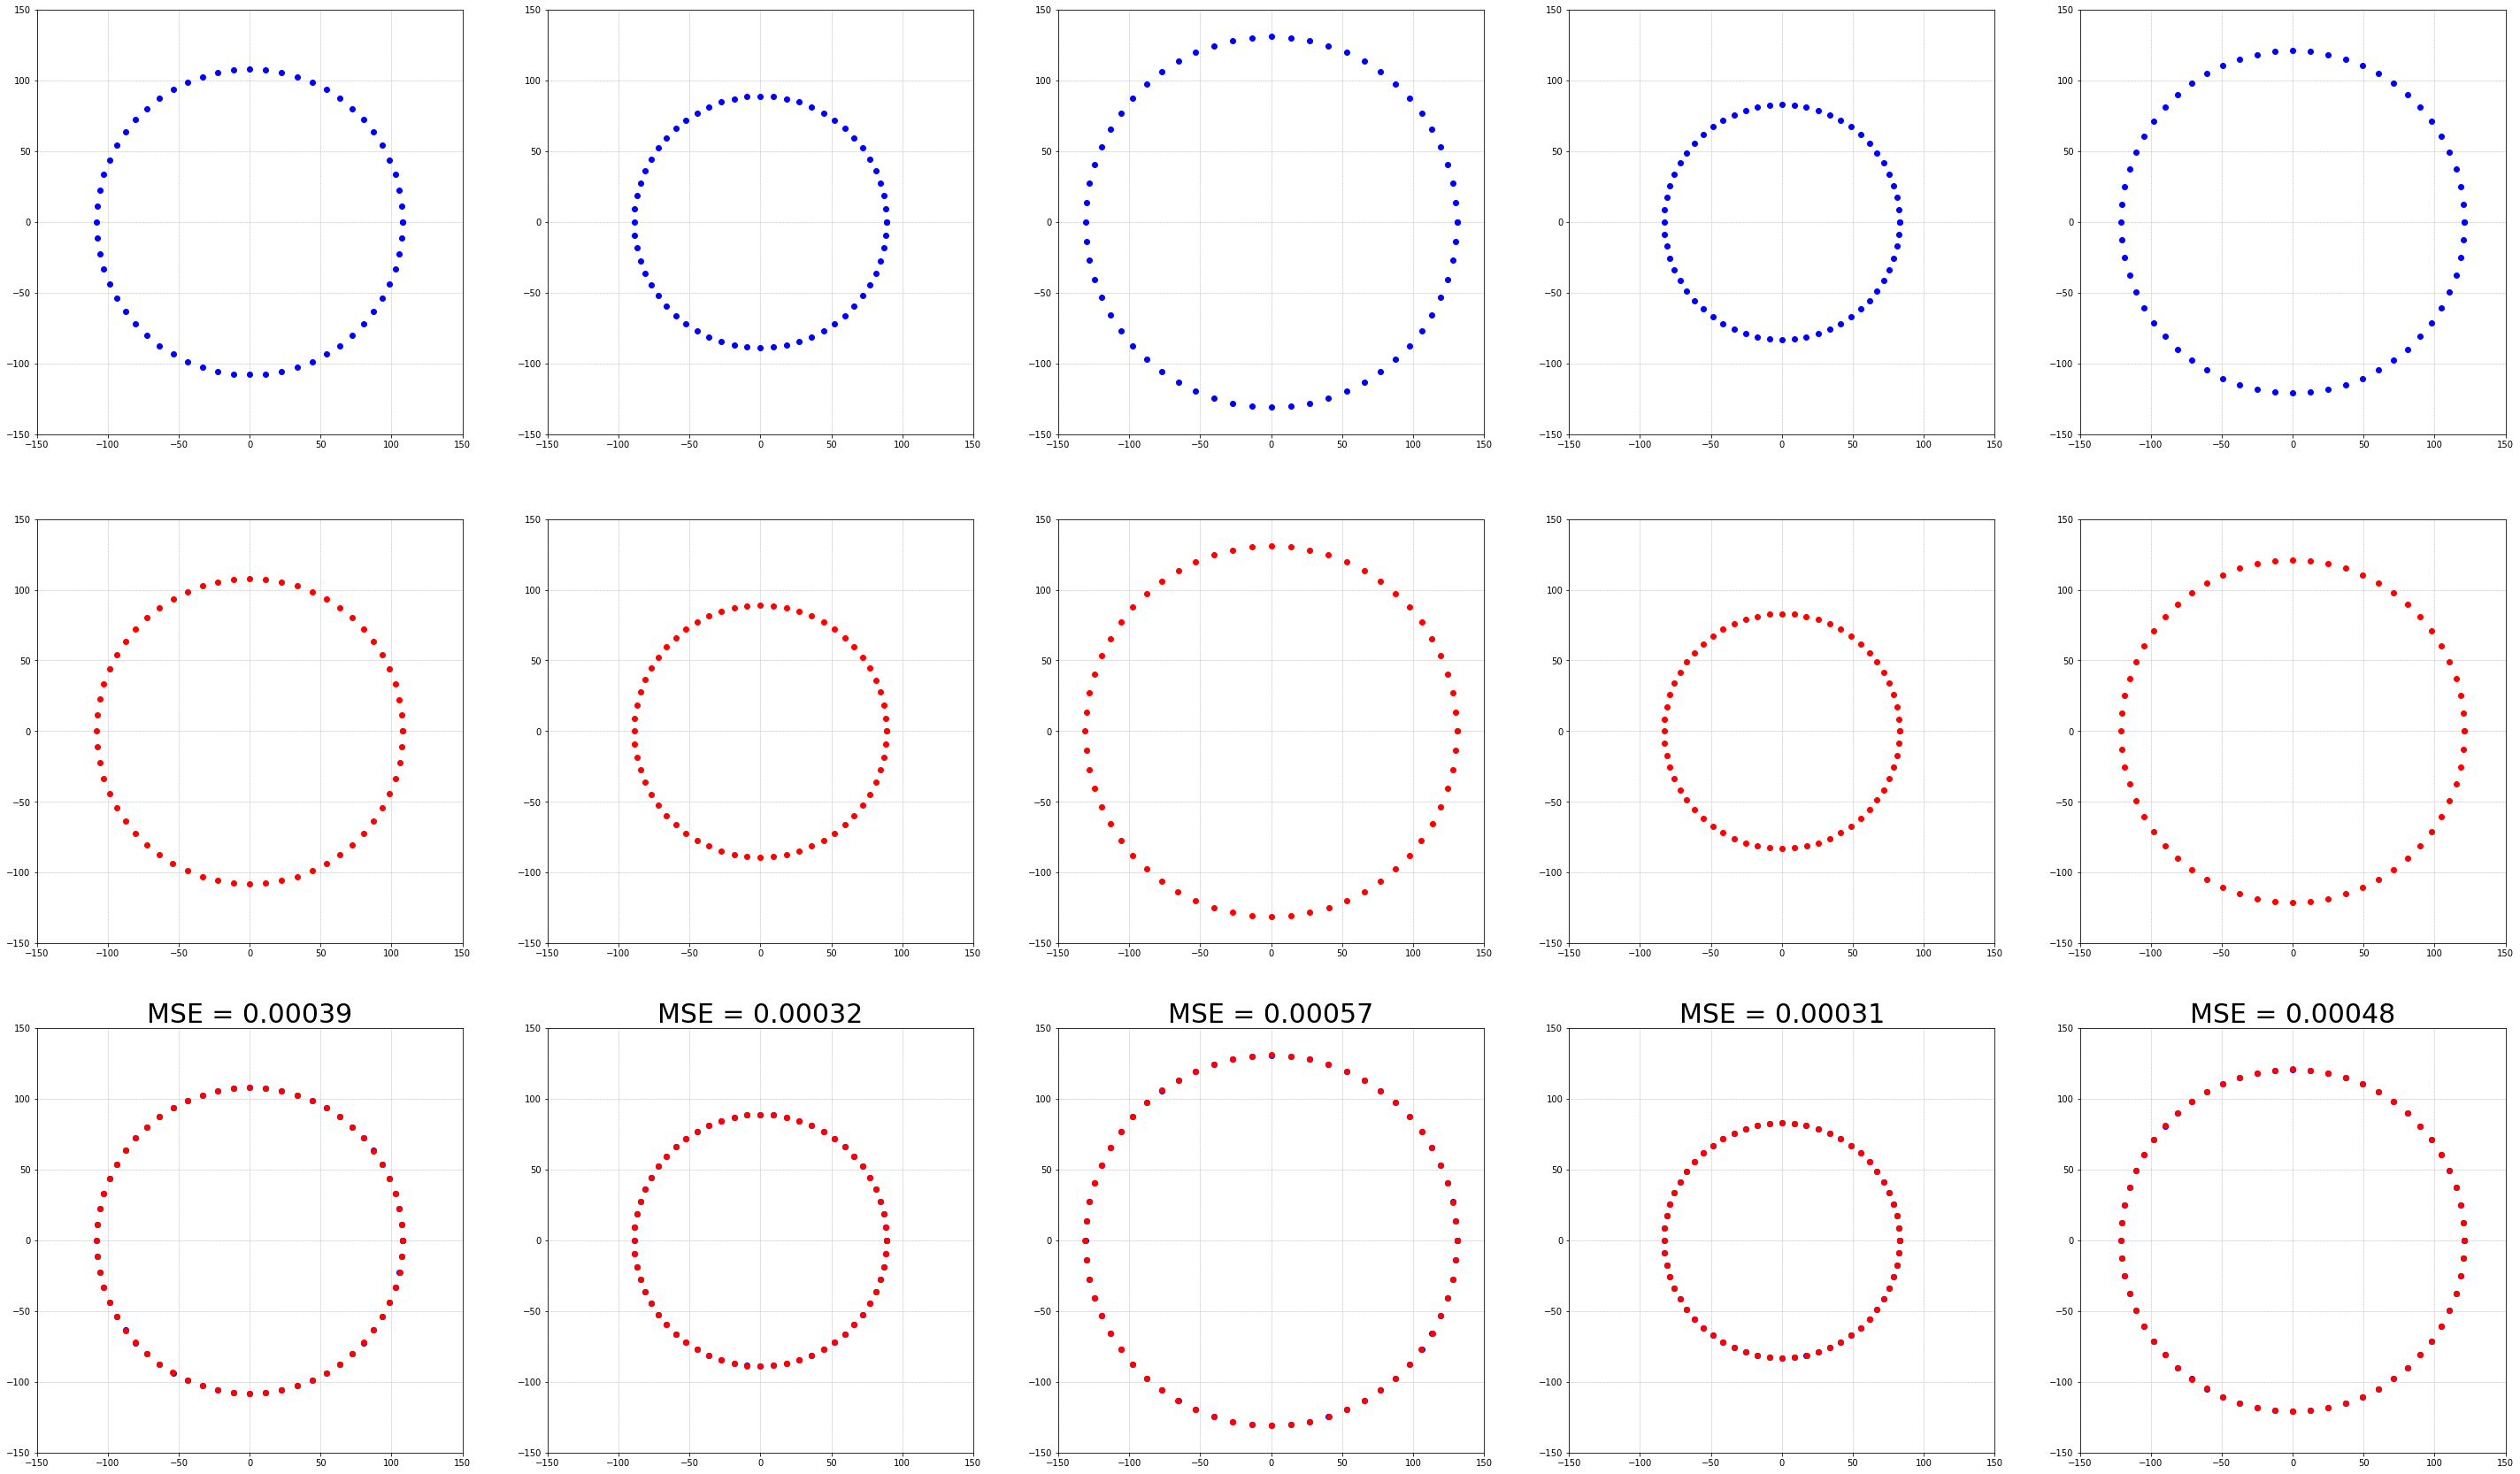

In [22]:
fig, ax = plt.subplots(nrows=3,ncols=5,figsize=(50,30))

for i in range(len(x_test)):
    ax[0,i].set_xlim(xmin=-150,xmax=150)
    ax[0,i].set_ylim(ymin=-150,ymax=150)
    ax[0,i].plot(x_test[i,0::2], x_test[i,1::2],'bo')
    ax[0,i].grid(linestyle = '--', linewidth = 0.5)
    
    ax[1,i].set_xlim(xmin=-150,xmax=150)
    ax[1,i].set_ylim(ymin=-150,ymax=150)
    ax[1,i].plot(decoded_2_pts[i,0::2], decoded_2_pts[i,1::2],'ro')
    ax[1,i].grid(linestyle = '--', linewidth = 0.5)
    
    ax[2,i].set_xlim(xmin=-150,xmax=150)
    ax[2,i].set_ylim(ymin=-150,ymax=150)
    ax[2,i].plot(x_test[i,0::2], x_test[i,1::2],'bo')
    ax[2,i].grid(linestyle = '--', linewidth = 0.5)
    ax[2,i].set_xlim(xmin=-150,xmax=150)
    ax[2,i].set_ylim(ymin=-150,ymax=150)
    ax[2,i].plot(decoded_2_pts[i,0::2], decoded_2_pts[i,1::2],'ro')
    ax[2,i].grid(linestyle = '--', linewidth = 0.5)
    ax[2,i].set_title("MSE = "+str(round(mean_squared_error(x_test[i],decoded_2_pts[i]),5)),fontsize=30)

In [23]:
mean_squared_error(x_test,decoded_2_pts)

0.0004168827212998624